<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230207_Predicting_Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이탈여부 예측 모델 만들기


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BankChurners.csv", encoding = "cp949")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [9]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [11]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [12]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [32]:
df = df.replace("Existing Customer", 0).replace("Attrited Customer", 1)
df = df.replace("M", 0).replace("F",1)
df = df.replace("Unknown", 0).replace("Uneducated", 1).replace("High School", 2).replace("College",3).replace("Graduate", 4).replace("Post-Graduate", 5).replace("Doctorate", 6)
df = df.replace("Blue", 0).replace("Silver", 1).replace("Gold", 2).replace("Platinum", 3)
df = df.replace("Unknown", 0).replace("Single", 1).replace("Married", 2).replace("Divorced",4)
df = df.replace("Unknown", 0).replace("Less than $40K", 1).replace("$40K - $60K", 2).replace("$60K - $80K", 3).replace("$80K - $120K", 4).replace("$120K +", 5)

In [33]:
df.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,0.529081,2.346203,2.601955,1.610447,2.085711,0.083638,35.928409,...,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,1.700417,0.910481,1.474639,0.333784,7.986416,...,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,31.000000,...,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,0.000000,46.000000,1.000000,2.000000,3.000000,2.000000,2.000000,0.000000,36.000000,...,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,0.000000,52.000000,1.000000,3.000000,4.000000,2.000000,3.000000,0.000000,40.000000,...,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,6.000000,4.000000,5.000000,3.000000,56.000000,...,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [37]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

In [38]:
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from scipy.stats import boxcox

In [40]:
#변수선택
#X에 고객번호, Y, 기존 데이터의 분석된 결과값 데이터 제외
X = df.drop(["CLIENTNUM", "Attrition_Flag", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1) 
Y = df["Attrition_Flag"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
1,9.985838,1.584127e-03,True,Gender
8,169.518463,2.587430e-38,True,Total_Relationship_Count
9,187.015865,4.853120e-42,True,Months_Inactive_12_mon
10,320.439851,4.000546e-70,True,Contacts_Count_12_mon
12,557.737195,9.191650e-119,True,Total_Revolving_Bal
14,121.708566,4.520522e-28,True,Total_Amt_Chng_Q4_Q1
15,210.454510,5.135010e-47,True,Total_Trans_Amt
16,1135.561211,4.947847e-231,True,Total_Trans_Ct
17,672.423884,1.025392e-141,True,Total_Ct_Chng_Q4_Q1
18,238.696301,5.495795e-53,True,Avg_Utilization_Ratio


In [41]:
#상관관계 분석
df1 = df[["Gender", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]]

df1.corr(method="pearson")

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Gender,1.000000,-0.003157,0.011163,-0.039987,-0.029658,-0.026712,-0.024890,0.067454,0.005800,0.257851
Total_Relationship_Count,-0.003157,1.000000,-0.003675,0.055203,0.013726,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.011163,-0.003675,1.000000,0.029493,-0.042210,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.039987,0.055203,0.029493,1.000000,-0.053913,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Total_Revolving_Bal,-0.029658,0.013726,-0.042210,-0.053913,1.000000,0.058174,0.064370,0.056060,0.089861,0.624022
Total_Amt_Chng_Q4_Q1,-0.026712,0.050119,-0.032247,-0.024445,0.058174,1.000000,0.039678,0.005469,0.384189,0.035235
Total_Trans_Amt,-0.024890,-0.347229,-0.036982,-0.112774,0.064370,0.039678,1.000000,0.807192,0.085581,-0.083034
Total_Trans_Ct,0.067454,-0.241891,-0.042787,-0.152213,0.056060,0.005469,0.807192,1.000000,0.112324,0.002838
Total_Ct_Chng_Q4_Q1,0.005800,0.040831,-0.038989,-0.094997,0.089861,0.384189,0.085581,0.112324,1.000000,0.074143
Avg_Utilization_Ratio,0.257851,0.067663,-0.007503,-0.055471,0.624022,0.035235,-0.083034,0.002838,0.074143,1.000000


In [50]:
#데이터 사전 전처리

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

#데이터 분할
num = ["Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", 
       "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", 
       "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"] 
cg = ["Gender"] 

X = df[num+cg]
Y = df["Attrition_Flag"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#스케일링(표준화, 원핫인코딩)
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#오버샘플링
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


In [52]:
#1. 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C = 1, random_state = 0)

logit.fit(X_train_over, Y_train_over)
Y_pred = logit.predict(X_test)

#Y_Pred
print("R2 : {:.3f}".format(logit.score(X_train_over, Y_train_over)))

from sklearn.metrics import classification_report
print("accuracy : {:.3f}".format(logit.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_) 

#accuracy = 0.854, f1-score = 0.76

R2 : 0.854
accuracy : 0.854
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2583
           1       0.49      0.85      0.62       456

    accuracy                           0.84      3039
   macro avg       0.73      0.84      0.76      3039
weighted avg       0.90      0.84      0.86      3039

[-1.51824515]
[[-0.65491425  0.62142792  0.61860359 -0.68571858 -0.1287351   1.93802427
  -3.10801445 -0.74868968 -0.03776269 -0.29493094  0.29474879]]


In [51]:
#2. K-NN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean") 

knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:.3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_pred, Y_test))

#accuracy = 0.945, f1-score = 0.75

accuracy : 0.954
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2360
           1       0.86      0.58      0.69       679

    accuracy                           0.89      3039
   macro avg       0.88      0.78      0.81      3039
weighted avg       0.88      0.89      0.88      3039



In [53]:
#3. DT
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=0, max_depth= 3)
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)
print("accuracy : {:.3f}".format(DT_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

#accuracy = 0.872, f1-score = 0.83

accuracy : 0.872
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2583
           1       0.69      0.73      0.71       456

    accuracy                           0.91      3039
   macro avg       0.82      0.84      0.83      3039
weighted avg       0.91      0.91      0.91      3039



In [54]:
#DT_'feature_importances_' : 변수 중요도

feature_name = X.columns
feature_importance = DT_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse= True)

# Total_Trans_CT가 가장 중요한 변수로 뽑힘

[(0.6705569496179876, 'Total_Trans_Ct'),
 (0.12843085186067738, 'Total_Revolving_Bal'),
 (0.10465241057050131, 'Total_Trans_Amt'),
 (0.08517235845071341, 'Total_Relationship_Count'),
 (0.011187429500120236, 'Total_Ct_Chng_Q4_Q1'),
 (0.0, 'Total_Amt_Chng_Q4_Q1'),
 (0.0, 'Months_Inactive_12_mon'),
 (0.0, 'Gender'),
 (0.0, 'Contacts_Count_12_mon'),
 (0.0, 'Avg_Utilization_Ratio')]

In [60]:
#모형성능비교 
num = ["Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", 
       "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", 
       "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"] 
cg = ["Gender"] 

X = df[num+cg]
Y = df["Attrition_Flag"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#스케일링(표준화, 원핫인코딩)
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#오버샘플링
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

#모형
logit = LogisticRegression(C = 1, random_state = 0)
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean") 
DT_model = DecisionTreeClassifier(random_state=0, max_depth= 3)

logit.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
DT_model.fit(X_train, Y_train)

logit_Y_pred = logit.predict(X_test)
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = DT_model.predict(X_test)

print("logit score : {:.3f}".format(logit.score(X_train, Y_train)))
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(DT_model.score(X_train, Y_train)))

#train accuracy = knn(0.95) > dt(0.87) > logit(0.85)

logit score : 0.854
knn score : 0.954
dt score : 0.872


In [61]:
print(classification_report(Y_test, logit_Y_pred))
print(classification_report(Y_test, knn_Y_pred))
print(classification_report(Y_test, dt_Y_pred))

#Prediction Accuracy = dt(0.83) > knn(0.81) > logit(0.76)

#knn과 dt중 ROC를 그려서 어떤 모델 선택할지 생각해보기

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2583
           1       0.49      0.85      0.62       456

    accuracy                           0.84      3039
   macro avg       0.73      0.84      0.76      3039
weighted avg       0.90      0.84      0.86      3039

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2583
           1       0.58      0.86      0.69       456

    accuracy                           0.89      3039
   macro avg       0.78      0.88      0.81      3039
weighted avg       0.91      0.89      0.89      3039

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2583
           1       0.69      0.73      0.71       456

    accuracy                           0.91      3039
   macro avg       0.82      0.84      0.83      3039
weighted avg       0.91      0.91      0.91      3039



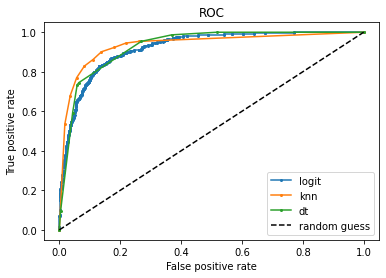

In [62]:
#plot

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

fpr1, tpr1, threshold = roc_curve(Y_test, logit.decision_function(X_test))
fpr2, tpr2, threshold = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold = roc_curve(Y_test, DT_model.predict_proba(X_test)[:,1])

#ROC
plt.plot(fpr1, tpr1, 'o-', ms=2, label = "logit") #'o'-> 표에서 점 모양, 'ms=2' -> 선 두께
plt.plot(fpr2, tpr2, 'o-', ms=2, label = "knn")
plt.plot(fpr3, tpr3, 'o-', ms=2, label = "dt")
plt.plot([0,1], [0,1], "k--", label = "random guess")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC")
plt.show()

#ROC를 본 결과, knn모델이 왼쪽 위에 제일 인접

In [63]:
logit_model_auc = roc_auc_score(Y_test, logit.decision_function(X_test))
knn_model_auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1])
dt_model_auc = roc_auc_score(Y_test, DT_model.predict_proba(X_test)[:,1])

print("logit AUC score: {:.3f}".format(logit_model_auc))
print("knn AUC score: {:.3f}".format(knn_model_auc))
print("dt AUC score: {:.3f}".format(dt_model_auc))

# AUC score이 가장 높은 knn모델 선택

logit AUC score: 0.922
knn AUC score: 0.936
dt AUC score: 0.929
